In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
import yfinance as yf
from datetime import date
import itertools
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric

# Data Preprocessing

In [2]:
# fetch the data
apple = yf.Ticker("AAPL")
apple

yfinance.Ticker object <AAPL>

In [4]:
#Get historical data
apple_data = apple.history(start ="2015-01-01", end=date.today(), interval="1d")

apple_data.tail()

Open        High         Low       Close    Volume  \
Date                                                                   
2021-06-07  126.169998  126.320000  124.830002  125.900002  71057600   
2021-06-08  126.599998  128.460007  126.209999  126.739998  74403800   
2021-06-09  127.209999  127.750000  126.519997  127.129997  56877900   
2021-06-10  127.019997  128.190002  125.940002  126.110001  71186400   
2021-06-11  126.529999  127.440002  126.099998  127.349998  53415300   

            Dividends  Stock Splits  
Date                                 
2021-06-07        0.0           0.0  
2021-06-08        0.0           0.0  
2021-06-09        0.0           0.0  
2021-06-10        0.0           0.0  
2021-06-11        0.0           0.0

### Data Visualization

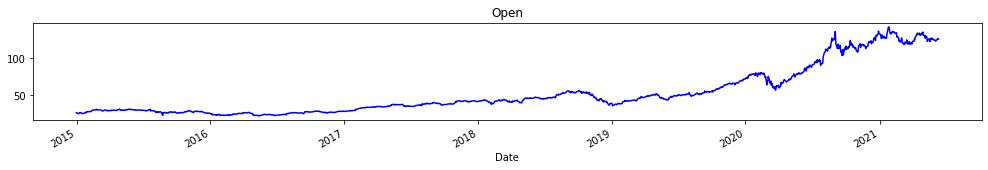

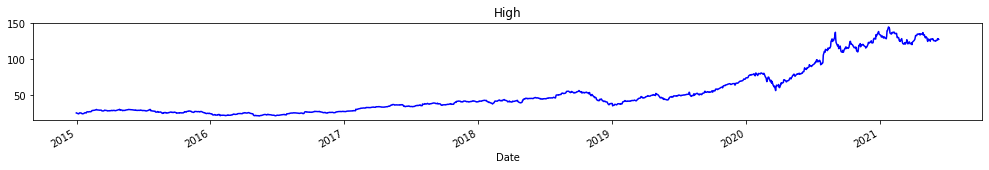

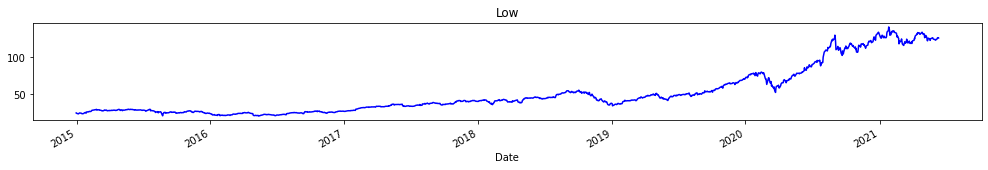

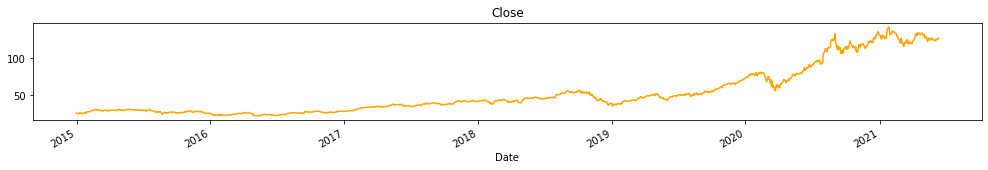

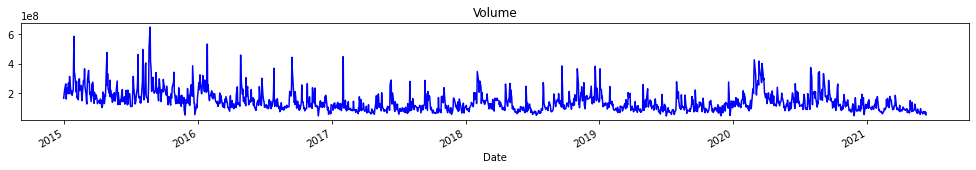

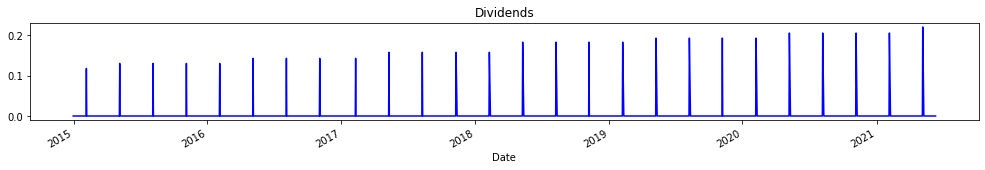

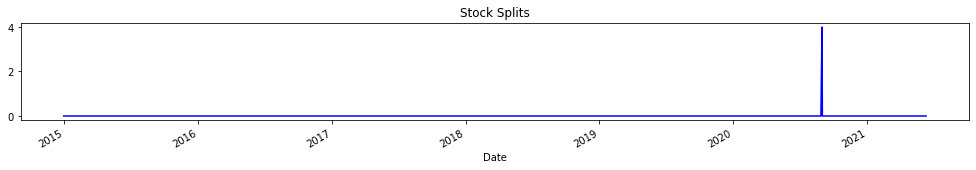

In [6]:
%matplotlib inline

for col in apple_data.columns:
    color="orange" if col == "Close" else "blue"
    apple_data[col].plot(figsize=(17, 2), color=color)
    plt.title(col)
    plt.show()

In [7]:
# Reset the index, change Date to column
apple_data = apple_data.reset_index()
apple_data.head()

Date       Open       High        Low      Close     Volume  \
0 2014-12-31  25.611516  25.681889  25.019014  25.057606  165613600   
1 2015-01-02  25.286885  25.298236  24.369756  24.819241  212818400   
2 2015-01-05  24.583150  24.664874  23.929355  24.120045  257142000   
3 2015-01-06  24.185883  24.387924  23.752289  24.122320  263188400   
4 2015-01-07  24.335706  24.562718  24.222200  24.460564  160423600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

In [8]:
#check if date is in datetime format
apple_data.Date.dtype

dtype('<M8[ns]')

### Changing the Column names
Facebook prophet takes only two features(columns). The column names must be ds: date, s:close. We are going to rename our columns.

In [9]:
#Extracting the date and close price columns
apple_df = apple_data[["Date", "Close"]]
apple_df.head()

Date      Close
0 2014-12-31  25.057606
1 2015-01-02  24.819241
2 2015-01-05  24.120045
3 2015-01-06  24.122320
4 2015-01-07  24.460564

In [10]:
#rename the columns
apple_df = apple_df.rename(columns={'Date': 'ds', 'Close': 'y'})
apple_df.head()

ds          y
0 2014-12-31  25.057606
1 2015-01-02  24.819241
2 2015-01-05  24.120045
3 2015-01-06  24.122320
4 2015-01-07  24.460564

### Splitting the Data

In [12]:
index = int(0.8 * apple_df.shape[0])
train_df = apple_df[:index]
test_df = apple_df[index:]

In [13]:
print(train_df.shape)
print(test_df.shape)

(1298, 2)
(325, 2)


### Hyperparameter Tuning

In [14]:
cutoffs = pd.to_datetime(["2016-01-09", "2016-07-09", "2017-01-09"])

In [15]:
# import itertools
# from fbprophet.diagnostics import performance_metrics
# from fbprophet.diagnostics import cross_validation
# from fbprophet.plot import plot_cross_validation_metric
# param_grid = {  
#     'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
#     'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
# }

# # Generate all combinations of parameters
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# rmses = []  # Store the RMSEs for each params here

# # Use cross validation to evaluate all parameters
# for params in all_params:
#     m = Prophet(**params).fit(train_df)  # Fit model with given params
#     df_cv = cross_validation(m, initial='730 days', period = '31 days', horizon = '365 days')
#     cutoffs = df_cv.groupby('cutoff').mean().reset_index()['cutoff']
#     cutoff = df_cv['cutoff'].unique()[0]
#     df_cv = df_cv[df_cv['cutoff'].values == cutoff]

#     rmses.append(df_p['rmse'].values[0])

# # Find the best parameters
# tuning_results = pd.DataFrame(all_params)
# tuning_results['rmse'] = rmses
# print(tuning_results)

## Fitting the Model

In [16]:
model = Prophet(changepoint_prior_scale=0.15, daily_seasonality=True,yearly_seasonality=True, interval_width = 0.95)
model.add_seasonality('self_define_cycle',period=8,fourier_order=8,mode='additive')
model.fit(train_df)

## Make Future Prediction
ðŸ‘‡Before predicting future values with Facebook's Prophet library, you first need to create a placeholder dataframe that will eventually hold the predictions. Once you create the dataframe, try to predict 2 years in the future.

You can create the predictions' dataframe using `make_future_dataframe()`

In [17]:
horizon = 36
future = model.make_future_dataframe(periods =horizon, freq="M")
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
1329 2022-09-30  170.696314 -256.595306  561.726971
1330 2022-10-31  176.507790 -276.014575  586.408797
1331 2022-11-30  181.056584 -290.000796  612.502410
1332 2022-12-31  185.940632 -308.676613  632.615726
1333 2023-01-31  190.775682 -332.511041  660.089716

## Plotting the Forecast

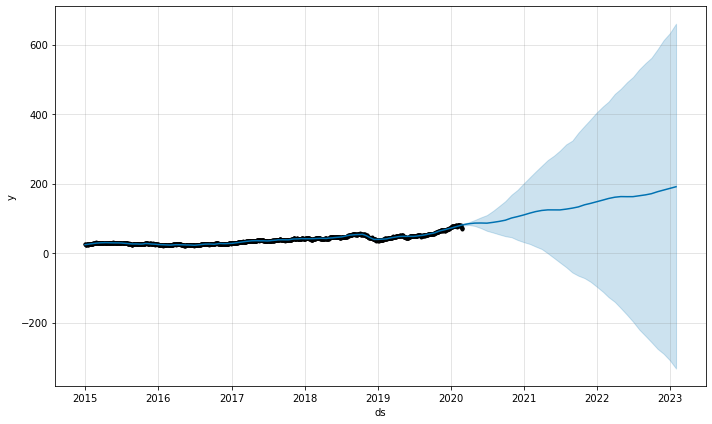

In [18]:
ax = model.plot(forecast);

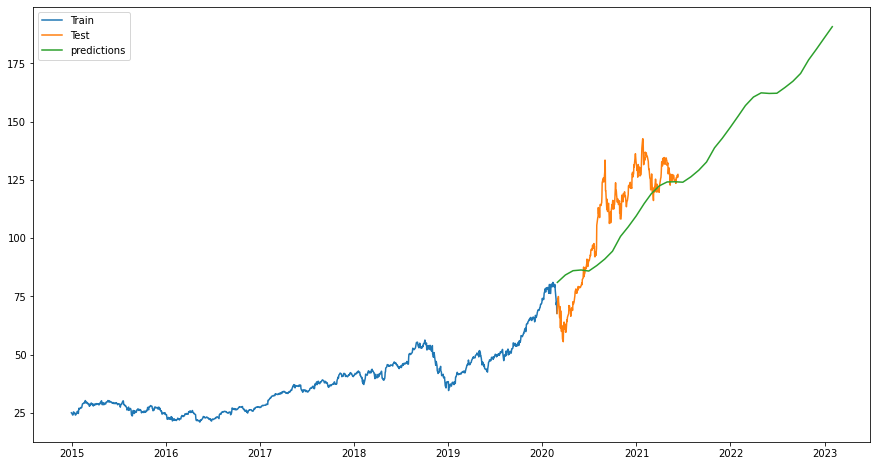

In [19]:
#Plotting the train, test and forecast for comparison
plt.figure(figsize=(15, 8))
plt.plot(train_df['ds'], train_df['y'], label="Train")
plt.plot(test_df['ds'], test_df['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

The Train data is from 2015-the beginning of 2020, while the test data is from the beginning of 2020 to middle of 2021 and our forecasted data started predicting from 2020 to 2023

## Time Series' trend and seasonality

ðŸ‘‡ Plot the trend and yearly seasonality of the time series. This can be done using the `plot_components()` function from Facebook's Prophet Library

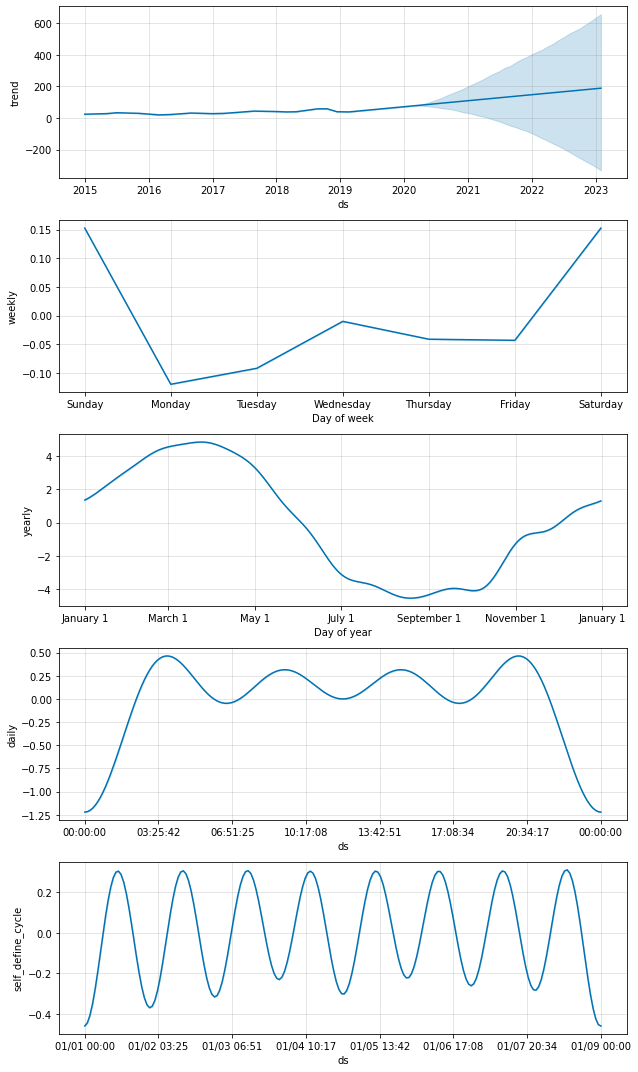

In [20]:
model.plot_components(forecast);

## Evaluating the model with cross-validation!
ðŸ‘‡ Using cross_validation() and performance_metrics() from fbprophet.diagnostics, evaluate the performance of your model

More precisely, create a Time Series K-fold CV with

* train sets of size 5 years
* horizon val sizes of 1 years
* shifting each fold by 180 days


In [21]:
# Your code here
cv_results = cross_validation(model=model, initial=f'{365 * 3} days', horizon='365 days', period='180 days')

INFO:fbprophet:Making 3 forecasts with cutoffs between 2018-03-04 00:00:00 and 2019-02-27 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

In [22]:
cv_results.tail()

ds       yhat  yhat_lower  yhat_upper          y     cutoff
748 2020-02-21  45.193341 -102.360413  178.075514  77.528809 2019-02-27
749 2020-02-24  45.635885 -103.558046  178.908933  73.846161 2019-02-27
750 2020-02-25  45.798713 -103.719670  179.942684  71.344841 2019-02-27
751 2020-02-26  45.964069 -103.915179  180.830894  72.476631 2019-02-27
752 2020-02-27  45.910828 -105.012611  180.724068  67.738968 2019-02-27

In [23]:
#performance metrics
df_p = performance_metrics(cv_results)
df_p.head()

horizon       mse      rmse       mae      mape     mdape  coverage
0 36 days  2.548872  1.596519  1.290592  0.027916  0.021462  0.853333
1 37 days  2.713593  1.647299  1.331945  0.028760  0.024816  0.853333
2 38 days  2.723438  1.650284  1.339501  0.028881  0.024816  0.853333
3 39 days  2.678273  1.636543  1.323276  0.028575  0.024816  0.860000
4 40 days  2.909232  1.705647  1.361640  0.029337  0.021462  0.875556

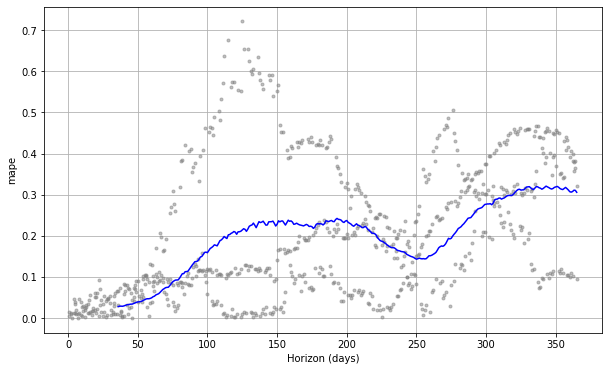

In [24]:
plot_cross_validation_metric(cv_results, metric='mape');

## Tuning our model

In [25]:
m = Prophet(
    growth="linear",
    seasonality_mode="additive",
    changepoint_prior_scale =30,
    seasonality_prior_scale=35,
    holidays_prior_scale = 20,
    daily_seasonality = False,
    weekly_seasonality = False,
    yearly_seasonality = False,).add_seasonality(
    name="monthly",
    period =30.5,
    fourier_order = 55).add_seasonality(
    name="daily",
    period =1,
    fourier_order = 15).add_seasonality(
    name="weekly",
    period = 7,
    fourier_order = 20).add_seasonality(
    name="yearly",
    period =365.25,
    fourier_order = 20).add_seasonality(
    name="quarterly",
    period =365.25/4,
    fourier_order = 15,
    prior_scale = 15)

In [26]:
m.fit(train_df)

In [27]:
import json
from fbprophet.serialize import model_to_json, model_from_json
with open('serialized_model.json', 'w') as apple:
    json.dump(model_to_json(m), apple)

In [28]:
horizon = 36
future = m.make_future_dataframe(periods =horizon, freq="M")
forecast2 = m.predict(future)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
1329 2022-09-30  173.235397 -153.420821  501.570475
1330 2022-10-31  179.798487 -162.358938  517.995457
1331 2022-11-30  184.586613 -175.026196  541.368464
1332 2022-12-31  189.715236 -185.234505  566.675044
1333 2023-01-31  194.930099 -197.909641  593.010953

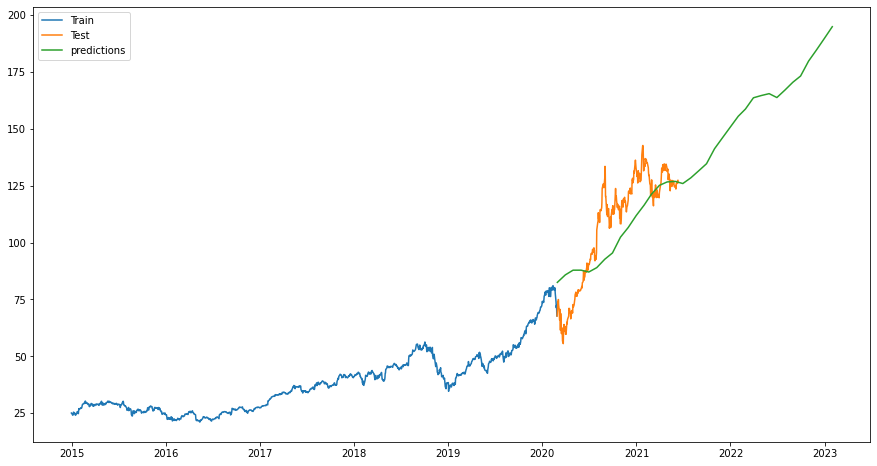

In [29]:
#Plotting the train, test and forecast for comparison
plt.figure(figsize=(15, 8))
plt.plot(train_df['ds'], train_df['y'], label="Train")
plt.plot(test_df['ds'], test_df['y'], label="Test")
plt.plot(forecast2[-horizon:]['ds'], forecast2[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

In [33]:
# Your code here
cv_results = cross_validation(model=m, initial=f'{365 * 3} days', horizon='365 days', period='180 days')

INFO:fbprophet:Making 3 forecasts with cutoffs between 2018-03-04 00:00:00 and 2019-02-27 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

In [34]:
#performance metrics
df_p = performance_metrics(cv_results)
df_p.head()

horizon       mse      rmse       mae      mape     mdape  coverage
0 36 days  1.884249  1.372679  1.140230  0.024719  0.021850  0.560000
1 37 days  1.859233  1.363537  1.126545  0.024367  0.020709  0.586667
2 38 days  1.890479  1.374947  1.130572  0.024326  0.020709  0.586667
3 39 days  1.896047  1.376970  1.136960  0.024443  0.021383  0.593333
4 40 days  2.064996  1.437010  1.162613  0.024893  0.021383  0.604444

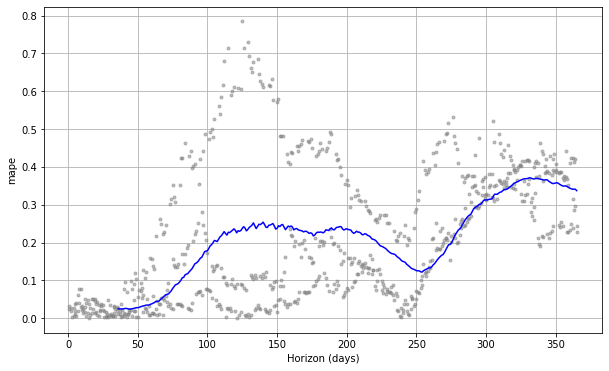

In [35]:
plot_cross_validation_metric(cv_results, metric='mape');